In [14]:
# !python train.py --img 640 --batch 16 --epochs 50 --data dataset.yaml --weights runs/train/exp12/weights/best.pt

In [15]:
# !python detect.py --weights runs/train/exp12/weights/best.pt --source test_images/imtest1.jpeg

In [1]:
import torch
from models.experimental import attempt_load
from utils import torch_utils
import cv2
import numpy as np
import time
from utils.general import non_max_suppression

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load model form file runs\train\exp12\weights\best.pt
path = 'runs/train/exp12/weights/best.pt'
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # yolov5n - yolov5x6 official model
#                                            'custom', 'path/to/best.pt')  # custom model
# model = torch.load(path)
model = torch.hub.load('ultralytics/yolov5', 'custom', path=path)  # load FP32 model

Using cache found in C:\Users\Acer/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-18 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)



requirements: D:\FRA361 ROBOTICS STUDIO IV  OPEN TOPICS\code\requirements.txt not found, check failed.


Fusing layers... 
Model summary: 308 layers, 21053802 parameters, 0 gradients
Adding AutoShape... 


In [15]:
#load image as cv2
img = cv2.imread('test_images\imtest1.jpeg')

img = cv2.resize(img, (640, 480))
img.shape[:2]

(480, 640)

In [10]:
time_now = time.time()
pred = model(img)
print('time: ', time.time() - time_now)

pred

time:  0.024494409561157227


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 340x675 1 Car, 8 Motorcycles
Speed: 2.0ms pre-process, 19.5ms inference, 1.5ms NMS per image at shape (1, 3, 352, 640)

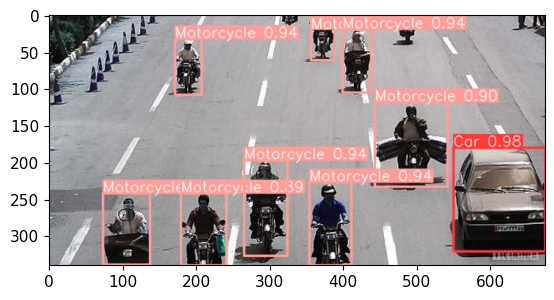

In [21]:
#render image with matplotlib like cv2.imshow('yolo',np.squeeze(pred.render()))
plt.imshow(np.squeeze(pred.render()))
plt.show()

In [24]:
df = pred.pandas().xyxy[0]

df.columns

Index(['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name'], dtype='object')

In [26]:

df = df[df['confidence'] > 0.5]
df = df[df['name'] == 'Motorcycle']

df['center_x'] = (df['xmin'] + df['xmax']) / 2
df['center_y'] = (df['ymin'] + df['ymax']) / 2

df

,xmin,ymin,xmax,ymax,confidence,class,name,center_x,center_y
1,354.093506,227.883286,411.589813,340.000000,0.944898,1,Motorcycle,382.841660,283.941643
2,399.379333,19.651300,438.369171,105.614914,0.943143,1,Motorcycle,418.874252,62.633107
3,265.645203,197.018143,324.059998,327.552765,0.939842,1,Motorcycle,294.852600,262.285454
4,171.078918,32.874168,207.288651,108.607658,0.937787,1,Motorcycle,189.183784,70.740913
5,356.290009,1.874040,388.966125,61.679516,0.912997,1,Motorcycle,372.628067,31.776778
6,443.059387,118.577492,542.771423,233.243134,0.899481,1,Motorcycle,492.915405,175.910313
7,179.383759,242.713364,241.800903,340.000000,0.886596,1,Motorcycle,210.592331,291.356682
